# Import package

In [1]:
import os
import pandas as pd
import numpy as np
from root_numpy import root2array 

Welcome to JupyROOT 6.20/04


$ cd <path_to_your_root_file>
$　root XXX.root
[root] _file0->ls()
[root] Delphes->MakeClass()

# Load root file

In [23]:
# root_file = "./SVJ_pythia/Z1500/delphes_nolhe_Z1500_rinv_03.root" #your root file path
root_file = "./SVJ_pythia/Nowidth/Z2000/delphes_nolhe_Z2000_rinv_04_Matching.root" #your root file path
# root_file = "./SVJ_pythia/Z1000/delphes_nolhe_Z1000_rinv_04.root" #your root file path

event = root2array(root_file, "Delphes;1", branches=["Particle.Status", "Particle.M1", "Particle.M2", "Particle.D1", "Particle.D2",
"Particle.PID", "Particle.PT",
"Particle.Eta","Particle.Phi", "Particle.Mass", "Particle.fUniqueID"],  start=0, stop=1000, step=None)

events = root2array(root_file, "Delphes;1", branches=[
 "Particle.Status", "Particle.M1", "Particle.M2", "Particle.D1", "Particle.D2",
 "Particle.PID", "Particle.PT",
 "Particle.Eta","Particle.Phi", "Particle.Mass", "Particle.fUniqueID"],object_selection={'Status == 23':[
'Particle.Status', 'Particle.M1', 'Particle.M2', 'Particle.D1', 'Particle.D2',
'Particle.PID', 'Particle.PT',
'Particle.Eta','Particle.Phi', 'Particle.Mass', "Particle.fUniqueID"]}, start=0, stop=1, step=None)
# in this example I set 
_Status, _M1, _M2, _D1, _D2, _PID, _PT, _Eta, _Phi, _Mass, _index = 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10
Labels = ["Status", "M1", "M2", "D1", "D2", "PID", "PT", "Eta", "Phi", "Mass"]



In [22]:
events = root2array(root_file, "Delphes;1", branches=[
 "Particle.Status", "Particle.M1", "Particle.M2", "Particle.D1", "Particle.D2",
 "Particle.PID", "Particle.PT",
 "Particle.Eta","Particle.Phi", "Particle.Mass", "Particle.fUniqueID"],object_selection={'Status == 23':[
'Particle.Status', 'Particle.M1', 'Particle.M2', 'Particle.D1', 'Particle.D2',
'Particle.PID', 'Particle.PT',
'Particle.Eta','Particle.Phi', 'Particle.Mass', "Particle.fUniqueID"]}, start=0, stop=1000, step=None)

In [3]:
event[0][_D1][event[0][_index]==6]

array([274], dtype=int32)

# Show truth record

In [24]:
# Particle status in Pythia8: http://home.thep.lu.se/~torbjorn/pythia81html/ParticleProperties.html
print("Index", "\t","Status", "\t","M1" "\t","M2" ,"\t","D1", "\t","D2", "\t","PID", "\t\t","PT" "\t","Eta", "\t\t","Phi", "\t\t","Mass")
for j in range(len(event[0][0])):  
    print(j, "\t", event[0][_Status][j],  "\t\t", event[0][_M1][j], "\t", event[0][_M2][j], "\t", event[0][_D1][j], "\t", 
          event[0][_D2][j],  "\t", str(event[0][_PID][j]).ljust(12, ' '), "\t", round(event[0][_PT][j],0),  "\t",
          str(round(event[0][_Eta][j],2)).ljust(12, ' ') , "\t",str(round(event[0][_Phi][j],3)).ljust(12, ' '),  "\t",round(event[0][_Mass][j],3)) 
 

Index 	 Status 	 M1	 M2 	 D1 	 D2 	 PID 		 PT	 Eta 		 Phi 		 Mass
0 	 4 		 -1 	 -1 	 312 	 -1 	 2212         	 0.0 	 999.9        	 0.0          	 0.938
1 	 4 		 -1 	 -1 	 313 	 -1 	 2212         	 0.0 	 -999.9       	 0.0          	 0.938
2 	 21 		 5 	 5 	 4 	 -1 	 2            	 0.0 	 999.9        	 0.0          	 0.0
3 	 21 		 6 	 -1 	 4 	 -1 	 -2           	 0.0 	 -999.9       	 0.0          	 0.0
4 	 22 		 2 	 3 	 7 	 7 	 5000001      	 0.0 	 999.9        	 0.0          	 1996.878
5 	 42 		 9 	 9 	 2 	 2 	 2            	 0.0 	 999.9        	 2.488        	 0.0
6 	 41 		 10 	 -1 	 8 	 3 	 -2           	 0.0 	 -999.9       	 -0.654       	 0.0
7 	 44 		 4 	 4 	 11 	 11 	 5000001      	 8.0 	 5.31         	 2.488        	 1996.878
8 	 43 		 6 	 -1 	 12 	 12 	 21           	 8.0 	 -2.78        	 -0.654       	 0.0
9 	 42 		 22 	 22 	 5 	 5 	 2            	 0.0 	 999.9        	 2.326        	 0.0
10 	 41 		 23 	 -1 	 13 	 6 	 -2           	 0.0 	 -999.9       	 -0.816       	 0.0
11 	 

# Define function to trace particle decay

In [25]:
def find_decayratio(event,n, mode = 'daughter'):
    d1, d2 = -1, -1
    d0 = -1
    ID = 4900101 #Xd PID
    for j in  range(len(event[n][0])):
        if(event[n][5][j]==ID)&(event[n][0][j]==23): #23 : hardest outgoing particles
            d1 = event[n][_D1][j]
            d2 = event[n][_D2][j]
            while((event[n][_PID][d1]==ID)or(event[n][5][d2]==ID) ):
                if(event[n][_PID][d1]==ID):
                    d0 = d1
                    d1 = event[n][_D1][d0]
                    d2 = event[n][_D2][d0]
                    if(event[n][_PID][d2]==ID):
                        d0 = d2
                        d1 = event[n][_D1][d0]
                        d2 = event[n][_D2][d0]
                        
    if mode=='daughter':
        return d1, d2
    if mode=='id':
        return event[n][5][d1], event[n][5][d2]
    
def find_subdecayratio(event, n, j, ID=4900111): 
    d1, d2 = -1, -1
    d0 = -1
    d1 = event[n][_D1][j]
    d2 = event[n][_D2][j]
    if((abs(event[n][_PID][d1])!=ID)&(abs(event[n][_PID][d2])!=ID)):
        d1=0
        d2=0
        return d1, d2
    else:
        while((abs(event[n][_PID][d1])==ID)or(abs(event[n][_PID][d2])==ID) ):
            if(abs(event[n][_PID][d1])==ID):
                d0 = d1
                d1 = event[n][_D1][d0]
                d2 = event[n][_D2][d0]
            if(abs(event[n][_PID][d2])==ID):
                d0 = d2
                d1 = event[n][_D1][d0]
                d2 = event[n][_D2][d0]
        return event[n][_PID][d1], event[n][_PID][d2]
def find_daughterid(event, n, j, ID=4900111):
    sid = event[n][_PID][j]
    if(sid!=ID):
        return 0, 0
    else:
        d1 = event[n][_D1][j]
        d2 = event[n][_D2][j]
        return event[n][_PID][d1], event[n][_PID][d2]
        

In [110]:
find_decayratio(event,0)

(370, 371)

# Trace certain particle ID untile it "decay" (daughter1!=daughter2)

In [9]:
n=0
ID=4900113
N = []
for j in  range(len(event[n][0])):
    if(event[n][_PID][j]==ID): #23 : hardest outgoing particles
        print("Self index in event",j)
        m1 = event[n][_M1][j]
        m2 = event[n][_M2][j]
        print("Mother:",m1,m2)
        if (m1==m2):
            print("Mother_id:", event[n][_PID][m1], "nan\n")
        else:
            print("Mother_id:", event[n][_PID][m1], event[n][_PID][m2],"\n")
        d1 = event[n][_D1][j]
        d2 = event[n][_D2][j]
        prevent = 0
        while(d1==d2): 
            d0 = d1
            if(d1==-1):
                print("stable particles\n\n")
                break
            if(prevent >= 100):
                print("infinite loop!")
                prevent=0
                break
            d1 = event[n][_D1][d1]
            d2 = event[n][_D2][d2]
            if(d1!=d2):
                N.append(d0)
            prevent= prevent+1
        if(d1!=-1):
            print("Daughter", d1, d2)
            print("Daughter_id", event[n][_PID][d1], event[n][_PID][d2])
            m1, m2 = event[n][_M1][d1], event[n][_M2][d1]
            print("Daughter1_parents", m1, m2)
            if(m1==m2):
                print("Daughter1_parents_id", event[n][_PID][m1], "nan") 
            else:
                print("Daughter1_parents_id", event[n][_PID][m1], event[n][_PID][m2])
            m1, m2 = event[n][_M1][d2], event[n][_M2][d2]
            print("Daughter2_parents", m1, m2)
            if(m1==m2): 
                print("Daughter2_parents_id", event[n][_PID][m1], "nan","\n")
            else:
                print("Daughter2_parents_id", event[n][_PID][m1], event[n][5][m2],"\n")

Self index in event 624
Mother: 562 623
Mother_id: 4900101 -4900101 

Daughter 973 974
Daughter_id 4900213 -4900213
Daughter1_parents 624 -1
Daughter1_parents_id 4900113 -211
Daughter2_parents 624 -1
Daughter2_parents_id 4900113 -211 

Self index in event 632
Mother: 562 623
Mother_id: 4900101 -4900101 

Daughter 975 976
Daughter_id -2 2
Daughter1_parents 632 -1
Daughter1_parents_id 4900113 -211
Daughter2_parents 632 -1
Daughter2_parents_id 4900113 -211 

Self index in event 633
Mother: 562 623
Mother_id: 4900101 -4900101 

Daughter 989 990
Daughter_id 4900213 -4900213
Daughter1_parents 633 -1
Daughter1_parents_id 4900113 -211
Daughter2_parents 633 -1
Daughter2_parents_id 4900113 -211 

Self index in event 634
Mother: 562 623
Mother_id: 4900101 -4900101 

Daughter 991 992
Daughter_id 4900213 -4900213
Daughter1_parents 634 -1
Daughter1_parents_id 4900113 -211
Daughter2_parents 634 -1
Daughter2_parents_id 4900113 -211 

Self index in event 641
Mother: 562 623
Mother_id: 4900101 -4900101 

# Trace outgoing Xd (4900101) in hardest subprocess 
# And then record the dark meson decay

In [26]:
# 4900111 and 4900113 is unstable dark meson
a113 = []
a111 = []
for n in range(1000):
    a1, a2 = find_decayratio(event,n) # find Xd -> a1 a2
    d1a1 = find_daughterid(event, n, a1, ID=4900111) # check whether a1 is 4900111 and find it's daughter
    d2a1 = find_daughterid(event, n, a2, ID=4900111) # check whether a2 is 4900111 and find it's daughter
    
    d1a2 = find_daughterid(event, n, a1, ID=4900113) # check whether a1 is 4900113 and find it's daughter
    d2a2 = find_daughterid(event, n, a2, ID=4900113) # check whether a2 is 4900113 and find it's daughter

    a111.append(d1a1)
    a111.append(d2a1)
    a113.append(d1a2)
    a113.append(d2a2)

# Calculate the ratio of stable dark meson in above record

In [27]:
#find 4900211 in 4900111 decay record (Note 4900211 is stable dark meson)
r = [sum([1 for i in a111 for j in i if (abs(j)== 4900211)]), sum([1 for i in a111 for j in i if (abs(j)!= 4900211)&(j!=0)])] 
print("The number_4900211/number_others in 4900111 decay particles : ", r[0]/sum(r))

The number_4900211/number_others in 4900111 decay particles :  0.3433962264150943


In [28]:
#find 4900213 in 4900113 decay record (Note 4900211 is stable dark meson)
r = [sum([1 for i in a113 for j in i if (abs(j)== 4900213)]), sum([1 for i in a113 for j in i if (abs(j)!= 4900213)&(j!=0)])] 
print("The number_4900213/number_others in 4900113 decay particles :", r[0]/sum(r))

The number_4900213/number_others in 4900113 decay particles : 0.40436456996148906


# Load weights and jets

In [33]:
nevn=20000 # number of event you generate in madgraph
W =  root2array(root_file, "Delphes;1", branches=["Event.Weight"], start=0, stop=20000, step=None) #weight for each event
jet = root2array(root_file, "Delphes;1", branches=["Jet.PT", "Jet.Eta", "Jet.Phi", "Jet.Mass"], start=0, stop=20000, step=None)
W = [i[0][0] for i in W] #just reset the data structure to convenienc
# root_file2 = "./SVJ_pythia/Z2000/delphes_nolhe_Z2000_rinv_01.root"
root_file2 = "./SVJ_pythia/Nowidth/Z2000/delphes_nolhe_Z2000_rinv_04.root"
jet2 = root2array(root_file2, "Delphes;1", branches=["Jet.PT", "Jet.Eta", "Jet.Phi", "Jet.Mass"], start=0, stop=20000, step=None)
W2 =  root2array(root_file2, "Delphes;1", branches=["Event.Weight"], start=0, stop=20000, step=None)
W2 = [i[0][0] for i in W2]
#We set
_JPT, _JEta, _JPhi, _JMass = 0, 1, 2, 3

In [25]:
nth_event = 9
nth_jet = 0
jet[nth_event][_JEta][nth_jet]

0.5122206807136536

# Define invariant mass function

In [30]:
def mass_inv(jet):
#    ["FatJet.PT", "FatJet.Eta", "FatJet.Phi", "FatJet.Mass"] 
# formula https://en.wikipedia.org/wiki/Invariant_mass#As_defined_in_particle_physics
    M_inv = 2*jet[_JPT][0]*jet[_JPT][1]*(np.cosh(jet[_JEta][0]-jet[_JEta][1])-np.cos(jet[_JPhi][0]-jet[_JPhi][1]))
    return M_inv**0.5
def mas_in(jet,n):
#    ["FatJet.PT", "FatJet.Eta", "FatJet.Phi", "FatJet.Mass"] 
# formula https://en.wikipedia.org/wiki/Invariant_mass#As_defined_in_particle_physics
    M_inv = 2*jet[_JPT][n]*jet[_JPT][n]*(np.cosh(jet[_JEta][n]-jet[_JEta][n])-np.cos(jet[_JPhi][n]-jet[_JPhi][n]))
    return M_inv**0.5
def ET(jet,n):
    return (mas_in(jet,n)**2+jet[_JPT][n]**2)**0.5
def deltaPhi(phi1,phi2):
    x = phi1-phi2
    while x>= np.pi: x -= np.pi*2.
    while x< -np.pi: x += np.pi*2.
    return x    

def mass_T(jet):
    M_T=2*ET(jet,1)*ET(jet,0)*(1-np.cos(deltaPhi(jet[_JPhi][1],jet[_JPhi][0])) ) 
    return  M_T**0.5

# Jet selection and fill up with invariant mass

In [31]:
## ALTAS selection
m_inv = []
m_T = []
Wc = []
for i in range(len(jet)):
    if jet[i][0].shape[0]<2: #at least two jet
        continue
    if jet[i][_JPT][0]<440: # leading jet pt >= 440 Gev
        continue
    if jet[i][_JPT][1]<60: #sub-leading jet pt >= 60 Gev
        continue
    if abs(jet[i][_JEta][0]-jet[i][_JEta][1])>=1.2:
        continue
    m_inv.append(mass_inv(jet[i]))
    m_T.append(mass_T(jet[i]))
    Wc.append(W[i])
m_inv2 = []
m_T2 = []
Wc2 = []
for i in range(len(jet2)):
    if jet2[i][0].shape[0]<2:
        continue
    if jet2[i][0][0]<440:
        continue
    if jet2[i][0][1]<60:
        continue
    if abs(jet2[i][1][0]-jet2[i][1][1])>=1.2:
        continue
    m_inv2.append(mass_inv(jet2[i]))
    m_T2.append(mass_T(jet2[i]))
    Wc2.append(W2[i])

In [8]:
## selection 2 ... NOT finish
m_inv = []
m_T = []
Wc = []
for i in range(len(jet)):
    if jet[i][0].shape[0]<2: #at least two jet
        continue
    if jet[i][_JPT][0]<440: # leading jet pt >= 440 Gev
        continue
    if jet[i][_JPT][1]<60: #sub-leading jet pt >= 60 Gev
        continue
#     if abs(jet[i][_JEta][0]-jet[i][_JEta][1])>=1.2:
#         continue
    m_inv.append(mass_inv(jet[i]))
    m_T.append(mass_T(jet[i]))
    Wc.append(W[i])
m_inv2 = []
m_T2 = []
Wc2 = []
for i in range(len(jet2)):
    if jet2[i][0].shape[0]<2:
        continue
    if jet2[i][0][0]<440:
        continue
    if jet2[i][0][1]<60:
        continue
#     if abs(jet2[i][1][0]-jet2[i][1][1])>=1.2:
#         continue
    m_inv2.append(mass_inv(jet2[i]))
    m_T2.append(mass_T(jet2[i]))
    Wc2.append(W2[i])

# Jet matching

In [ ]:
events = root2array(root_file, "Delphes;1", branches=[
 "Particle.Status", "Particle.M1", "Particle.M2", "Particle.D1", "Particle.D2",
 "Particle.PID", "Particle.PT",
 "Particle.Eta","Particle.Phi", "Particle.Mass", "Particle.fUniqueID"],object_selection={'Status == 23 & PID == 4900101':[
'Particle.Status', 'Particle.M1', 'Particle.M2', 'Particle.D1', 'Particle.D2',
'Particle.PID', 'Particle.PT',
'Particle.Eta','Particle.Phi', 'Particle.Mass', "Particle.fUniqueID"]}, start=0, stop=1, step=None)

# Calculate the cross section in root

In [34]:
Xection = sum(W)/nevn
Xection_with_selection = sum(Wc)/nevn/Xection
Lumi = 37 #Luminosity fb^-1
expected_yield = (Xection)*Lumi*1000  #expected yield
expected_yield_c = (Xection_with_selection)*Lumi*1000 #expected yield
print("Cross section(pb) \t Cross section with selection(pb) \t Expected yield (tatal)\t Expected yield for Selection")
print(Xection,"\t",Xection_with_selection,"\t\t\t",expected_yield,'\t',expected_yield_c)

Cross section(pb) 	 Cross section with selection(pb) 	 Expected yield (tatal)	 Expected yield for Selection
0.7868780493736267 	 0.09515 			 29114.48782682419 	 3520.55


# Plot

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


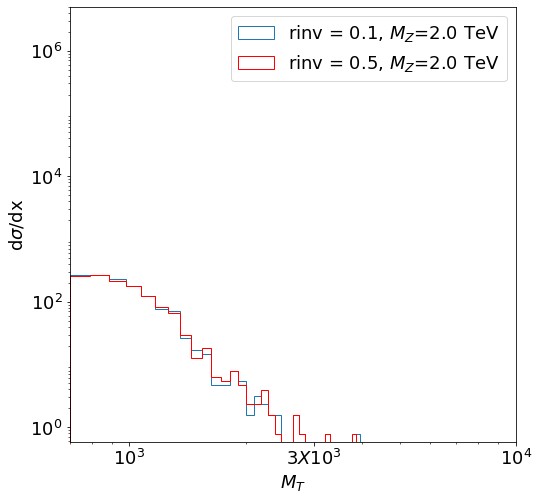

In [35]:
import matplotlib.pyplot as plt
bins = 100
fs=18 # front size
tagsize = 18 # label tag size ((\blue block) W \n (\orange block) QCD )
plt.figure(figsize=(8,8)) # plotsize
x1, x2 = 700, 10000

bisize = np.linspace(500,10000,101)


plt.hist(m_inv2 ,bins=bins, histtype='step',  range=[x1, x2], weights= np.array(Wc2),
         label='rinv = 0.1, ${M_{Z}}$=2.0 TeV')
plt.hist(m_inv ,bins=bins, histtype='step', color='r', range=[x1, x2], weights= np.array(Wc),
         label='rinv = 0.5, ${M_{Z}}$=2.0 TeV')

  
plt.legend(prop={'size': tagsize}) # plot label tag
plt.yscale('log')
plt.xscale('log')
plt.xlabel('${M_{T}}$' , fontsize=fs)  # plot x-axis label
plt.ylabel("d${\sigma}$/dx", fontsize=fs)  # plot y-axis label $\u03C3^{-1}$
plt.ylim((0,5000000))
plt.xlim((x1,x2))
plt.xticks([1000,3000,10000], ['${10^3}$', '3${X}$${10^{3}}$','${10^{4}}$' ],fontsize=fs)   # set x-ticks size
plt.yticks([1,100,10000,1000000],fontsize=fs)   # set y-ticks size 
# plt.savefig("./invariant_mass_JET_SVJ_Z2000_Z2000.png")  #save figure as png  
plt.show() 

In [28]:
def deltaPhi(phi1,phi2):
    x = phi1-phi2
    while x>= np.pi: x -= np.pi*2.
    while x< -np.pi: x += np.pi*2.
    return x

def deltaR(eta1,phi1,eta2,phi2):
    return (deltaPhi(phi1,phi2)**2+(eta1-eta2)**2)**0.5
    
    
def Match(jet, event, dR, _pid=1, _pT=2, _eta=3, _phi=4, _m=5, R = 0.5):
    return (dR > deltaR(jet[1][0],jet[2][0],event[_eta],event[_phi]))
def Match_dR(jet, event, _pid=5, _pT=6, _eta=7, _phi=8, _m=9, R = 0.5):
    return deltaR(jet[1][0],jet[2][0],event[_eta],event[_phi])

In [35]:
def Event_n(i, less=True, root_file = root_file):
#     root_file = "./SVJ_pythia/Z1500/delphes_nolhe_Z1500_rinv_03.root"
    # root_file = "./delphes_nolhe_Alan.root"
    # root_file = "./delphes_nolhe_papper.root"
    # root_file = "./delphes_nolhe_SVJ_Z1500_rinv_03.root"
    if less:
        event = root2array(root_file, "Delphes;1", branches=[
            "Particle.Status", "Particle.PID", "Particle.PT",
            "Particle.Eta","Particle.Phi", "Particle.Mass"], start=i, stop=i+1, step=None)
    else:
        event = root2array(root_file, "Delphes;1", branches=[
            "Particle.Status", "Particle.M1", "Particle.M2", "Particle.D1", "Particle.D2",
            "Particle.PID", "Particle.PT",
            "Particle.Eta","Particle.Phi", "Particle.Mass"], start=i, stop=i+1, step=None)
    return event

In [36]:
event = Event_n(n)
event

array([(array([ 4,  4, 21, ...,  1,  1,  1], dtype=int32), array([2212, 2212,   -2, ...,  130,  211, -211], dtype=int32), array([ 0.        ,  0.        ,  0.        , ...,  9.3917141 ,
       20.48707199,  9.76797485]), array([ 9.99900024e+02, -9.99900024e+02,  9.99900024e+02, ...,
       -3.24166358e-01, -3.16757292e-01, -3.63271505e-01]), array([0.        , 0.        , 0.        , ..., 2.43377185, 2.45469117,
       2.4825635 ]), array([0.93826997, 0.93826997, 0.        , ..., 0.49761   , 0.13957   ,
       0.13957   ]))],
      dtype=[('Particle.Status', 'O'), ('Particle.PID', 'O'), ('Particle.PT', 'O'), ('Particle.Eta', 'O'), ('Particle.Phi', 'O'), ('Particle.Mass', 'O')])

In [34]:
event

In [38]:
Opat = []
for n in range(20000):
    
    event = Event_n(n,root_file = root_file)
    if n%100==0:
        print([[event[0][j][i] for j in range((len(event[0])))] for i in range(len(event[0][0])) if event[0][0][i] == 23])
    Opat.append([[event[0][j][i] for j in range(len(event[0]))] for i in range(len(event[0][0])) if event[0][0][i] == 23])

    del event

[[23, 4900101, 816.2633666992188, -1.2162904739379883, -1.0247451066970825, 10.0], [23, -4900101, 1068.6817626953125, -0.43998846411705017, 2.3188955783843994, 10.0]]
[[23, 4900101, 633.1232299804688, 0.571002185344696, 1.4802430868148804, 10.0], [23, -4900101, 671.0384521484375, -1.435126781463623, -1.6488287448883057, 10.0]]
[[23, 4900101, 421.183837890625, 1.8975152969360352, 0.6563782095909119, 10.0], [23, -4900101, 611.5548706054688, -0.6124765872955322, -0.5215386748313904, 10.0]]
[[23, 4900101, 929.3164672851562, -0.42209598422050476, -0.2143147587776184, 10.0], [23, -4900101, 1084.5130615234375, -0.323334664106369, 3.0819544792175293, 10.0]]
[[23, 21, 425.5216369628906, 2.1991822719573975, -2.902132272720337, 0.0], [23, 21, 131.9100341796875, 2.270080089569092, -1.67056143283844, 0.0], [23, 4900101, 790.407470703125, 0.31043484807014465, -3.0399563312530518, 10.0], [23, -4900101, 1268.8798828125, 0.6336150169372559, 0.24531149864196777, 10.0]]
[[23, 4900101, 871.4493408203125, 

KeyboardInterrupt: 

In [27]:
parton_pT = []
jet_pT = []
for i in range(len(jet)):
    dR = 999
    ppT = -1
    if len(jet[i][0])<1:
        continue
    for j in range(len(Opat[i])):
        if Match(jet[i], Opat[i][j], dR):
            dR = Match_dR(jet[i], Opat[i][j])
            ppT = Opat[i][j][6]
            jpt = jet[i][0][0]
    parton_pT.append(ppT)
    jet_pT.append(jpt)
        
    

NameError: name 'Opat' is not defined

In [ ]:
plt.hist([jet_pT[i]/parton_pT[i] for i in range(len(jet_pT))] , bins=100)
plt.show()